In [158]:
# Import the libraries needed
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# 1. Load the dataset and print how many data instances we have
dataset = pd.read_csv('/content/drive/MyDrive/IA_764/concrete.csv')
dataset = pd.DataFrame(dataset)
# show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [159]:
# show dataset info - describe dataset
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [160]:
# show dataset info - top 10 rows
dataset.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [161]:
# 2. Check if there are any missing values in any of the columns
# using isnull() function
dataset.isnull()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [162]:
# 3.Split the data into the features and the target 
# Print first few rows of X and y.
dataset = dataset.values 
# Features
x = dataset[:,0].reshape(-1,1)
# Target 
y = dataset[:,1]

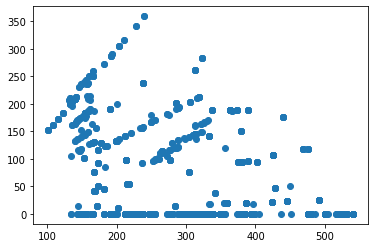

In [163]:
# plot the data set
plt.scatter(x, y)

In [164]:
# Print first few rows of x - top 10 rows
print(x[:10])

[[540. ]
 [540. ]
 [332.5]
 [332.5]
 [198.6]
 [266. ]
 [380. ]
 [380. ]
 [266. ]
 [475. ]]


In [165]:
# Print first few rows of y
print(y)

[  0.    0.  142.5 ... 139.4 186.7 100.5]


In [166]:
# 4.Normalize all columns of X using standardization.
x_standardized = preprocessing.scale(x, axis=0) 
# Print first few rows of standardized X - top 10 rows
print(x_standardized[:10])

[[ 2.47791487]
 [ 2.47791487]
 [ 0.49142531]
 [ 0.49142531]
 [-0.79045879]
 [-0.14520869]
 [ 0.94616388]
 [ 0.94616388]
 [-0.14520869]
 [ 1.85564103]]


In [167]:
#learning rate scheduler
def learning_rate_scheduler(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001

In [168]:
# let build a simple NN Regression model
def mnRegressionModel(x, y, optimizer_value):
  regressor=LinearRegression()
  regressor.fit(x,y)

  # Now lets define our Tensorflow model
  model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=[1])
  ])

  # Specifying learning rate and momentum with desired optimizer
  if optimizer_value is 'SGD':
    model.compile(
        optimizer=tf.keras.optimizers.SGD(0.01, 0.9),loss='mse'
        )
  elif optimizer_value is 'Adam':
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),loss='mse'
        )
  else:
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(0.001),loss='mse'
        )

  # learning rate scheduler 
  # calling learning_rate_scheduler function 
  scheduler=tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
  
  # Train the model
  # Fit function has a parameter for batch_size. 
  # If unspecified batch_sizewill default to 32.
  # Run it for 100 epochs
  # 30% of thedata for validation - 0.3
  r = model.fit(
      x,y, epochs=100, validation_split=0.3, verbose=0, callbacks=[scheduler]
      ) 

  # get model weights
  weights = model.layers[0].get_weights()

  model_result = {
        "Intercept": regressor.intercept_,
        "Coefficient of Regressin": regressor.coef_,
        "Weoghts": weights
    }

  return model_result, r

In [169]:
def show_result(x, y, optimizer):
  output = mnRegressionModel(x, y, optimizer)[0]
  r = mnRegressionModel(x, y, optimizer)[1]
  plt.plot(r.history['loss'])
  print(output)

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-1.385884]], dtype=float32), array([1.2356644], dtype=float32)]}


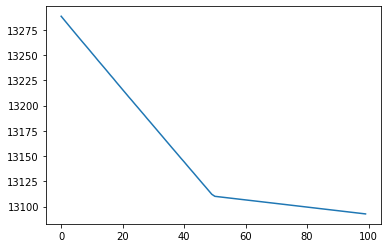

In [170]:
# 5.Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and adam for optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'Adam')

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-13.9145775]], dtype=float32), array([75.57734], dtype=float32)]}


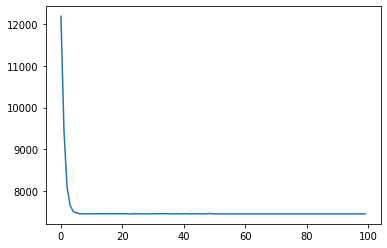

In [171]:
# 6. Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and SGD for optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'SGD')

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-1.7640821]], dtype=float32), array([1.2477446], dtype=float32)]}


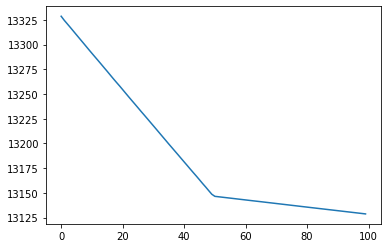

In [172]:
# 7. Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and rmspropfor optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'RMSprop')

In [173]:
# 8.Which network performed the best? 
# Do you have ideas on how the performance can be improved?

# To get started we know that Optimizers are used to tune the parameters of 
# the neural network to minimize the cost function. That's being said, I think
# SGD performed the best.It has a higher a good learning rate and provided 
# better result as shown on the plot. 

# The porformenace can be improved by making chnage on the learning rate and
# the percenateg of the data allocated for validation and epochs. 
# As these have impact on the training